<a href="https://colab.research.google.com/github/HeshamKhaled12/Machine-Learning-/blob/main/GDSC_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First Lets Preprocess the data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


%matplotlib inline

In [ ]:
data=pd.read_csv("/content/breast-cancer.csv")
data.head(100)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,...,25.38,17.33,184.60,2019.0,0.1622,0.66560,0.71190,0.26540,0.4601,0.11890
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,...,24.99,23.41,158.80,1956.0,0.1238,0.18660,0.24160,0.18600,0.2750,0.08902
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,...,23.57,25.53,152.50,1709.0,0.1444,0.42450,0.45040,0.24300,0.3613,0.08758
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,...,14.91,26.50,98.87,567.7,0.2098,0.86630,0.68690,0.25750,0.6638,0.17300
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,...,22.54,16.67,152.20,1575.0,0.1374,0.20500,0.40000,0.16250,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,86208,M,20.260,23.03,132.40,1264.0,0.09078,0.13130,0.146500,0.086830,...,24.22,31.59,156.10,1750.0,0.1190,0.35390,0.40980,0.15730,0.3689,0.08368
96,86211,B,12.180,17.84,77.79,451.1,0.10450,0.07057,0.024900,0.029410,...,12.83,20.92,82.14,495.2,0.1140,0.09358,0.04980,0.05882,0.2227,0.07376
97,862261,B,9.787,19.94,62.11,294.5,0.10240,0.05301,0.006829,0.007937,...,10.92,26.29,68.81,366.1,0.1316,0.09473,0.02049,0.02381,0.1934,0.08988
98,862485,B,11.600,12.84,74.34,412.6,0.08983,0.07525,0.041960,0.033500,...,13.06,17.16,82.96,512.5,0.1431,0.18510,0.19220,0.08449,0.2772,0.08756


In [ ]:
data.drop('id',axis=1 , inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
#replacing the M with 1 for having cancer
#replacing the B with 0 for not having cancer
data["diagnosis"]=data["diagnosis"].replace("M",1)
data["diagnosis"]=data["diagnosis"].replace("B",0)
data["diagnosis"].astype(int)

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

Lets separate the data into 3 items (Mean , SE ,Worst)

In [ ]:
mean=data[["diagnosis",'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',]]

<Axes: >

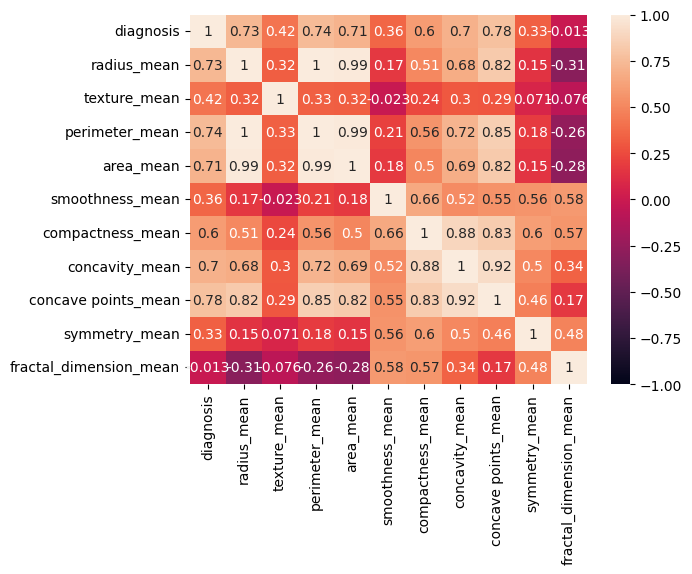

In [ ]:
sns.heatmap(mean.corr(), vmin=-1,vmax=1, annot=True)

We can see a high corr between (radius and perimeter and area) and a high corr between (compactness and concavity and concave ) we make a pairplot of them


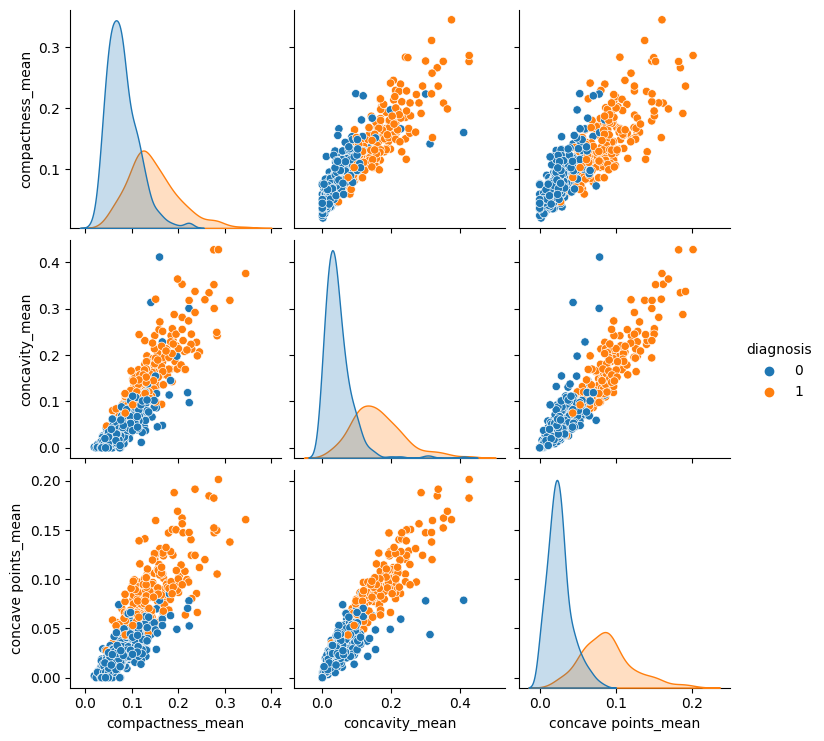

In [ ]:
mean2=data[["diagnosis",'compactness_mean', 'concavity_mean','concave points_mean']]
sns.pairplot(mean2 ,hue="diagnosis")


As we can see the similarity in the plots in mean1 between (area and radius and perimeter) and the similarity in mean2 between(compactness and concavity and concave point)

We now make the same to the SE data and the worst data


In [ ]:
SE=data[["diagnosis",'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se']]

<Axes: >

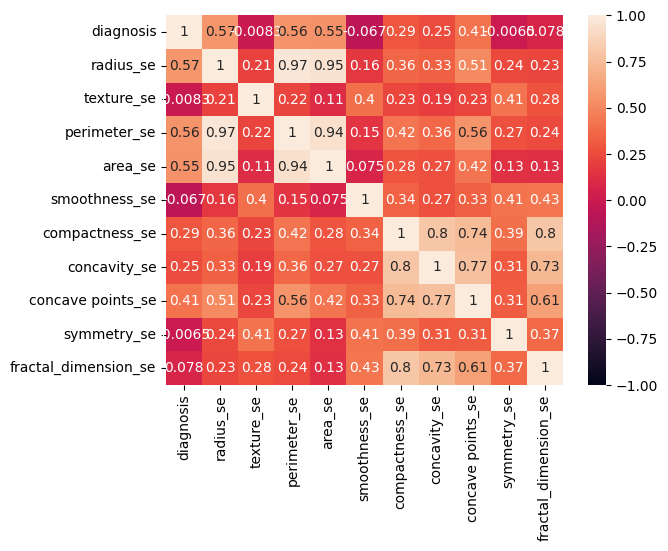

In [ ]:
sns.heatmap(SE.corr(), vmin=-1 ,vmax=1 ,annot=True)

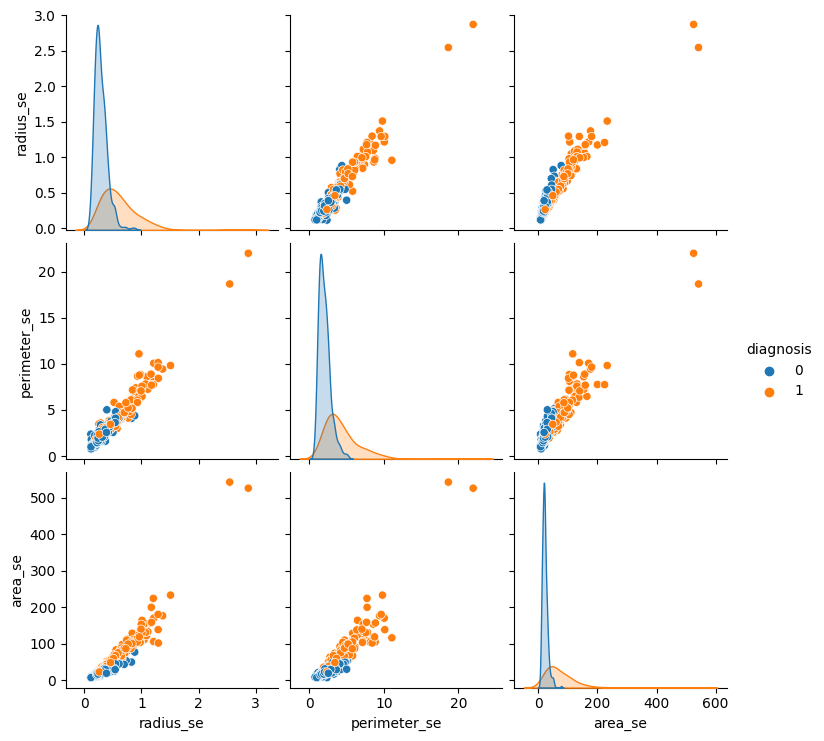

In [ ]:
SE1=data[["diagnosis",'radius_se', 'perimeter_se', 'area_se']]
sns.pairplot(SE1 , hue="diagnosis")

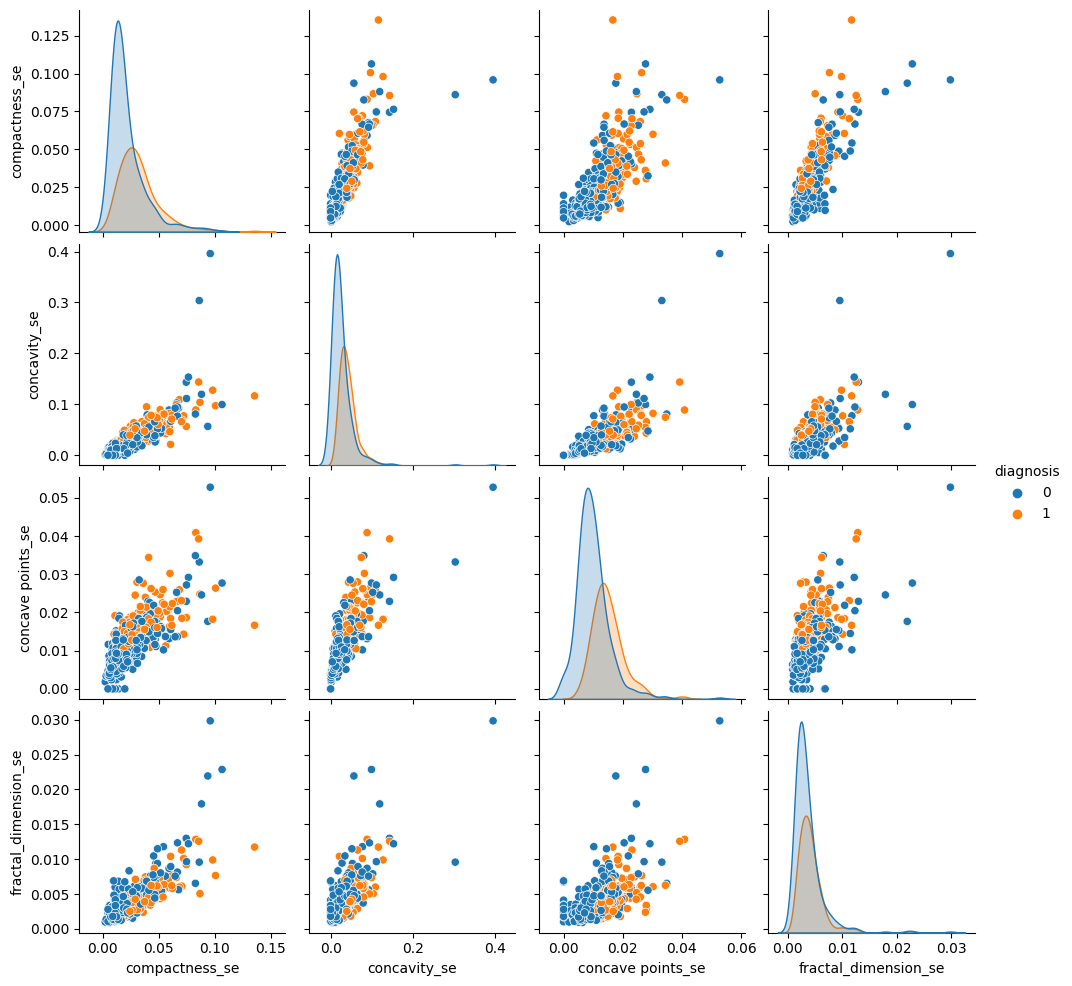

In [ ]:
SE2=data[["diagnosis",'compactness_se', 'concavity_se','concave points_se','fractal_dimension_se']]
sns.pairplot(SE2,hue="diagnosis")

lets make the last for the _worst data

<Axes: >

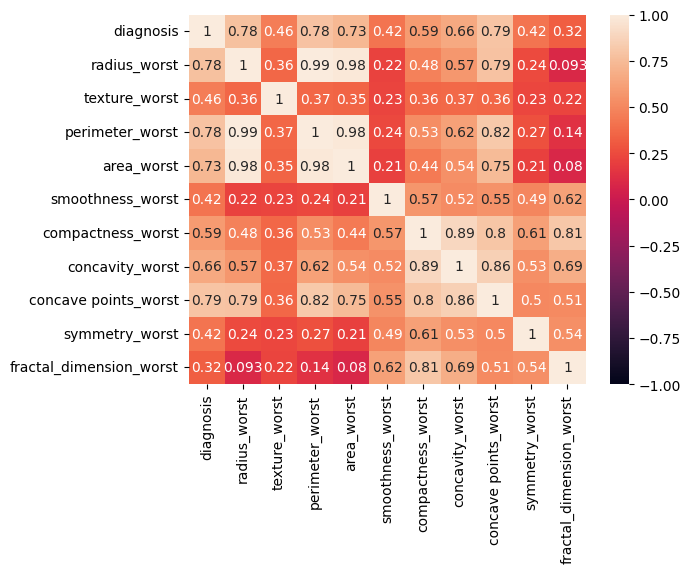

In [ ]:
worst=data[['diagnosis','radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]
sns.heatmap(worst.corr(),vmin=-1,vmax=1, annot=True)

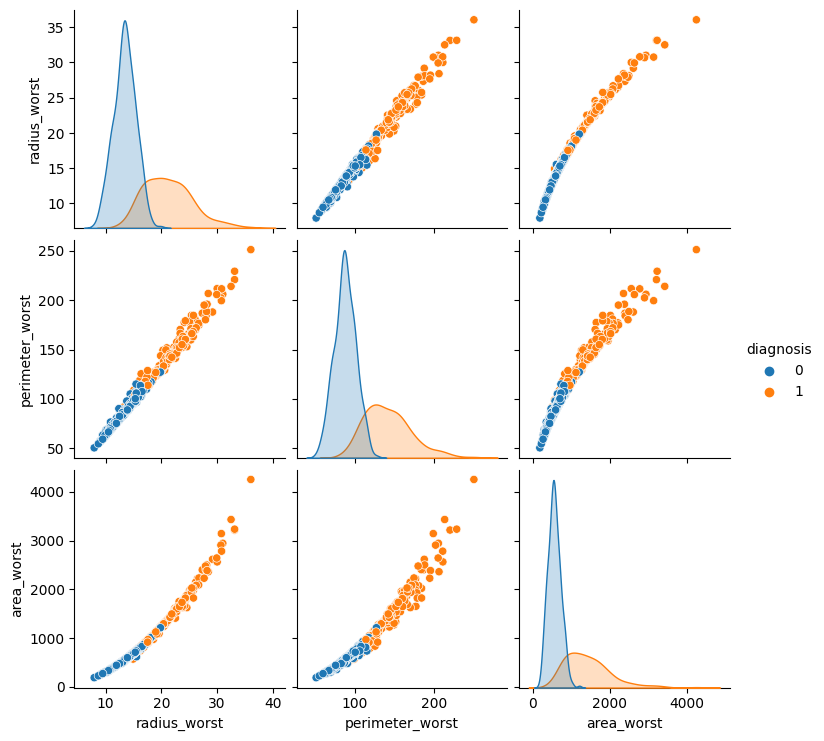

In [ ]:
worst1=data[["diagnosis",'radius_worst', 'perimeter_worst', 'area_worst']]
sns.pairplot(worst1, hue="diagnosis")

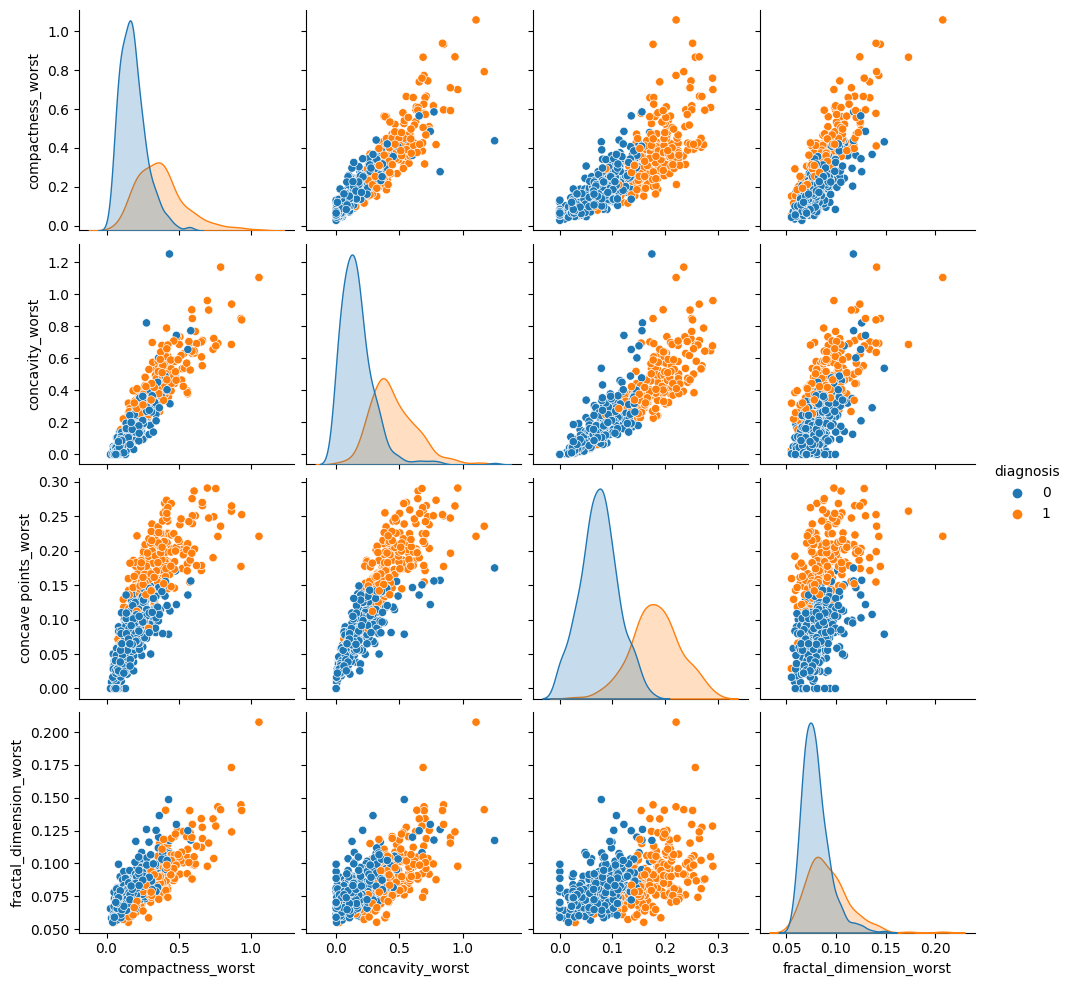

In [ ]:
worst2=data[["diagnosis",'compactness_worst', 'concavity_worst', 'concave points_worst', 'fractal_dimension_worst']]
sns.pairplot(worst2,hue="diagnosis")

lets try the knn algorithm


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
x=data[['perimeter_mean','concave points_se','perimeter_se','concave points_mean','concave points_se','perimeter_worst', 'concave points_worst',
        'texture_worst','texture_mean','smoothness_worst']]
y=data['diagnosis']
#x=data[['area_mean','compactness_se','area_se','compactness_mean','area_worst', 'compactness_worst']]
#y=data['diagnosis']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.12,random_state=1)

In [ ]:
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.fit_transform(x_test)

In [ ]:
neighbors=np.arange(1,15)
train_acc=np.empty(len(neighbors))
test_acc=np.empty(len(neighbors))

for i , k in enumerate (neighbors):
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train,y_train)
  train_acc[i]=knn.score(x_train,y_train)
  test_acc[i]=knn.score(x_test,y_test)


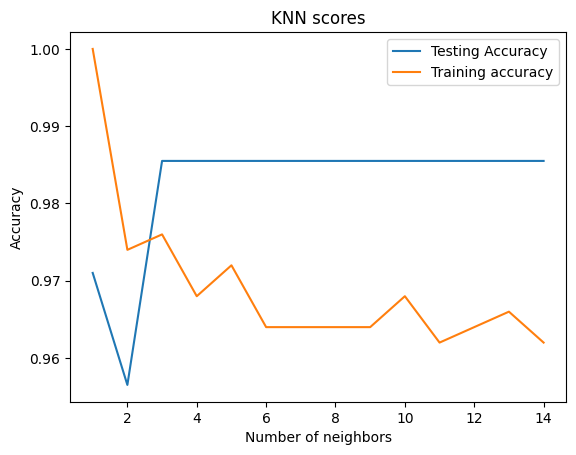

In [ ]:
plt.title('KNN scores')
plt.plot(neighbors, test_acc, label='Testing Accuracy')
plt.plot(neighbors, train_acc, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)


In [ ]:
print(knn.score(x_test,y_test))
print(knn.score(x_train,y_train))

0.9855072463768116
0.976


Now lets try the logistics regression


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.12,random_state=1)

In [ ]:
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
logreg.predict(x_test)
pred=logreg.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print(logreg.score(x_test,y_test))
print(logreg.score(x_train,y_train))


0.9420289855072463
0.948


Now lets try the SVM

In [ ]:
from sklearn import metrics
from sklearn.svm import LinearSVC

In [ ]:
x=data[['perimeter_mean','concave points_se','perimeter_se','concave points_mean','concave points_se','perimeter_worst', 'concave points_worst',
        'texture_worst','texture_mean','smoothness_worst']]
y=data['diagnosis']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.12,random_state=1)

In [ ]:
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.fit_transform(x_test)

In [ ]:
vectors=LinearSVC()
vectors.fit(x_train,y_train)
train_pred=vectors.predict(x_train)
y_preds=vectors.predict(x_test)

print(metrics.accuracy_score(y_train,train_pred))
print(metrics.accuracy_score(y_test,y_preds))


0.964
0.9855072463768116
